In [1]:
from rdkit import Chem
from rdkit.Chem import AllChem, Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem.Draw import MolDrawing, DrawingOptions,IPythonConsole
from IPython.display import Image, SVG

DrawingOptions.bondLineWidth=1.8
DrawingOptions.atomLabelFontSize=14
DrawingOptions.includeAtomNumbers=True

In [2]:
def mol_with_atom_index(mol):
    atoms = mol.GetNumAtoms()
    for idx in range(atoms):
        mol.GetAtomWithIdx(idx).SetProp('molAtomMapNumber', str(mol.GetAtomWithIdx(idx).GetIdx()))
    return mol

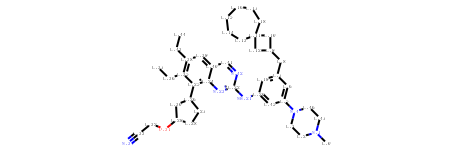

In [3]:
mol = Chem.MolFromSmiles('CN1CCN(C2=CC(CC3CC4(C3)CCCCCC4)=CC(NC5=NC6=C(C7CCC(C7)OCC#N)C(CC)=C(C=C6C=N5)CC)=C2)CC1')
AllChem.Compute2DCoords(mol)
Chem.Kekulize(mol, clearAromaticFlags=True)
mol = mol_with_atom_index(mol)
mol

In [4]:
def showsvg(mol, frgm):
    size=(450, 450)
    matches = frgm
    drawer = Draw.rdMolDraw2D.MolDraw2DSVG(size[0], size[1])
    drawer.DrawMolecule(mol, highlightAtoms=matches)
    drawer.FinishDrawing()
    svg = drawer.GetDrawingText()
    display(SVG(svg.replace('svg:', '')))

In [13]:
showsvg(mol, [24,25,35,38,39,40,41,42,22,23])

In [14]:
matches = [24,25,35,38,39,40,41,42,22,23]
for idx_atom in matches:
    bonds= mol.GetAtomWithIdx(idx_atom).GetBonds()
    for bond in bonds:
        if not bond.IsInRing():
            print ([bond.GetBondType()], bond.GetIdx(), bond.GetBeginAtomIdx(), bond.GetEndAtomIdx())

[rdkit.Chem.rdchem.BondType.SINGLE] 25 25 26
[rdkit.Chem.rdchem.BondType.SINGLE] 35 35 36
[rdkit.Chem.rdchem.BondType.SINGLE] 42 38 43
[rdkit.Chem.rdchem.BondType.SINGLE] 21 21 22


In [10]:
showsvg(mol, [34,35,28,29,27,50,23,24])

ValueError: list element larger than allowed value

In [8]:
mol.GetAtomWithIdx(35).SetAtomicNum(0)
mol.GetAtomWithIdx(29).SetAtomicNum(0)
mol.GetAtomWithIdx(50).SetAtomicNum(0)
mol.GetAtomWithIdx(23).SetAtomicNum(0)
mol

In [9]:
mol1 = Chem.DeleteSubstructs(mol, Chem.MolFromSmarts('C12=CC=CC=C1C=NC=N2'))
mol1

In [10]:
mol1.GetSubstructMatches(Chem.MolFromSmarts('[#0]'))

((23,), (24,), (29,), (40,))

In [11]:
mod = Chem.MolFromSmiles('C12=CC=CC1C=CC=CC2')
mod=mol_with_atom_index(mod)
mod

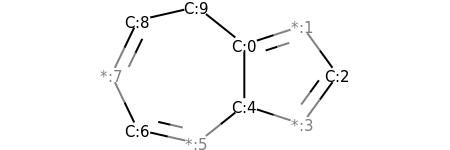

In [12]:
mod.GetAtomWithIdx(7).SetAtomicNum(0)
mod.GetAtomWithIdx(5).SetAtomicNum(0)
mod.GetAtomWithIdx(1).SetAtomicNum(0)
mod.GetAtomWithIdx(3).SetAtomicNum(0)
mod

In [13]:
combo = Chem.CombineMols(mol1,mod)
AllChem.Compute2DCoords(combo)
combo

In [14]:
combo.GetSubstructMatches(Chem.MolFromSmarts('[#0]'))

((23,), (24,), (29,), (40,), (51,), (53,), (55,), (57,))

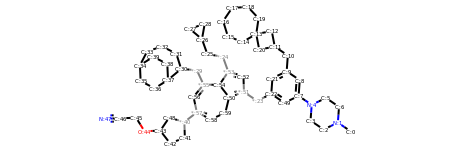

In [16]:
a = [23, 24,29,40]
b = [51,53,55,57]
edcombo = Chem.EditableMol(combo)
edcombo.AddBond(23,51,order=Chem.rdchem.BondType.SINGLE)
edcombo.AddBond(24,53,order=Chem.rdchem.BondType.SINGLE)
edcombo.AddBond(29,55,order=Chem.rdchem.BondType.SINGLE)
edcombo.AddBond(40,57,order=Chem.rdchem.BondType.SINGLE)
back = edcombo.GetMol()
AllChem.Compute2DCoords(back)
Chem.SanitizeMol(back)
Chem.Kekulize(back, clearAromaticFlags=True)
back = mol_with_atom_index(back)

back

In [17]:
back.GetSubstructMatches(Chem.MolFromSmarts('C12CCCCC(CC2)CC1'))

((34, 33, 32, 31, 30, 37, 36, 35, 38, 39),)

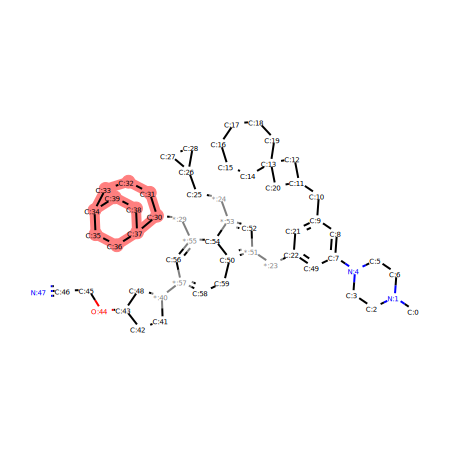

In [18]:
showsvg(back, [34, 33, 32, 31, 30, 37, 36, 35, 38, 39])

In [19]:
back.GetAtomWithIdx(53).SetAtomicNum(7)
showsvg(back, [34, 33, 32, 31, 30, 37, 36, 35, 38, 39])

In [9]:
print list(mol.GetAtomWithIdx(35).GetPropNames())

['molAtomMapNumber']


In [ ]:

mol1 = Chem.DeleteSubstructs(mol, Chem.MolFromSmarts('[#0]'))

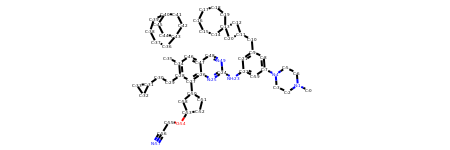

In [10]:
rwmol = Chem.rdchem.RWMol(mol)
rwmol.RemoveBond(35, 36)
rwmol

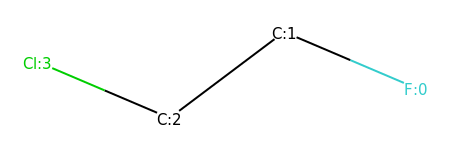

In [19]:
m = Chem.MolFromSmiles('FCCCl')
m = mol_with_atom_index(m)
m

In [20]:
m.GetAtomWithIdx(2).SetAtomicNum(0)
m.GetAtomWithIdx(0).SetAtomicNum(0)
m

In [21]:
print list(m.GetAtomWithIdx(2).GetPropNames())

['molAtomMapNumber']


In [22]:
m.GetSubstructMatches(Chem.MolFromSmarts('[#0]'))

((0,), (2,))

In [26]:
combo = Chem.CombineMols(m,Chem.MolFromSmiles('OC=O'))
combo = mol_with_atom_index(combo)
combo

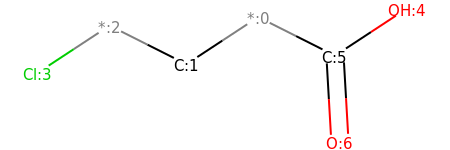

In [27]:
edcombo = Chem.EditableMol(combo)
edcombo.AddBond(0,5,order=Chem.rdchem.BondType.SINGLE)
back = edcombo.GetMol()
back = mol_with_atom_index(back)
back